In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pygsheets
import pandas as pd
import sys
import inspect
from datetime import datetime, timedelta
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
sys.path.append(parentdir + '/modeling')
sys.path.append(parentdir + '/functions')
import load_data
from fit_and_predict import fit_and_predict_ensemble
from functions import merge_data
from viz import viz_interactive, viz_static
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
from functions import merge_data
from fit_and_predict import add_preds
from update_severity_index import df_to_plot, add_severity_index

NUM_DAYS_LIST = [1, 2, 3, 4, 5, 6, 7]
cs = ['#6E8E96', '#D3787D', '#AC3931']
df_hospital = load_data.load_hospital_level(data_dir=oj(os.path.dirname(parentdir), 'covid-19-private-data'))
df_county = load_data.load_county_level(data_dir=oj(parentdir, 'data'))
df_county = add_preds(df_county, NUM_DAYS_LIST=NUM_DAYS_LIST, cached_dir=oj(parentdir, 'data')) # adds keys like "Predicted Deaths 1-day"
df = merge_data.merge_county_and_hosp(df_county, df_hospital)
df = add_severity_index(df, NUM_DAYS_LIST)
df = df.sort_values('Total Deaths Hospital', ascending=False)
d = df_to_plot(df, NUM_DAYS_LIST)

Loading BokehJS ...

loaded and merged COVID-19 cases/deaths data successfully


# hospital-level plot

**some important features**
1. deaths so far$^*$
1. predicted deaths in next few days$^*$
1. number ICU beds (proxy for current resources)
1. social vulnerability index
1. rural or urban

$^*$note: hospital death numbers are estimated by splitting the county-level numbers based on the number of employees at each hospital

**current index calculations**
- severity index: threshold the total predicted deaths = current deaths + predicted deaths
- surge index: total predicted deaths * 2 - number ICU beds
- rural index: same as severity index, but only using rural hospitals

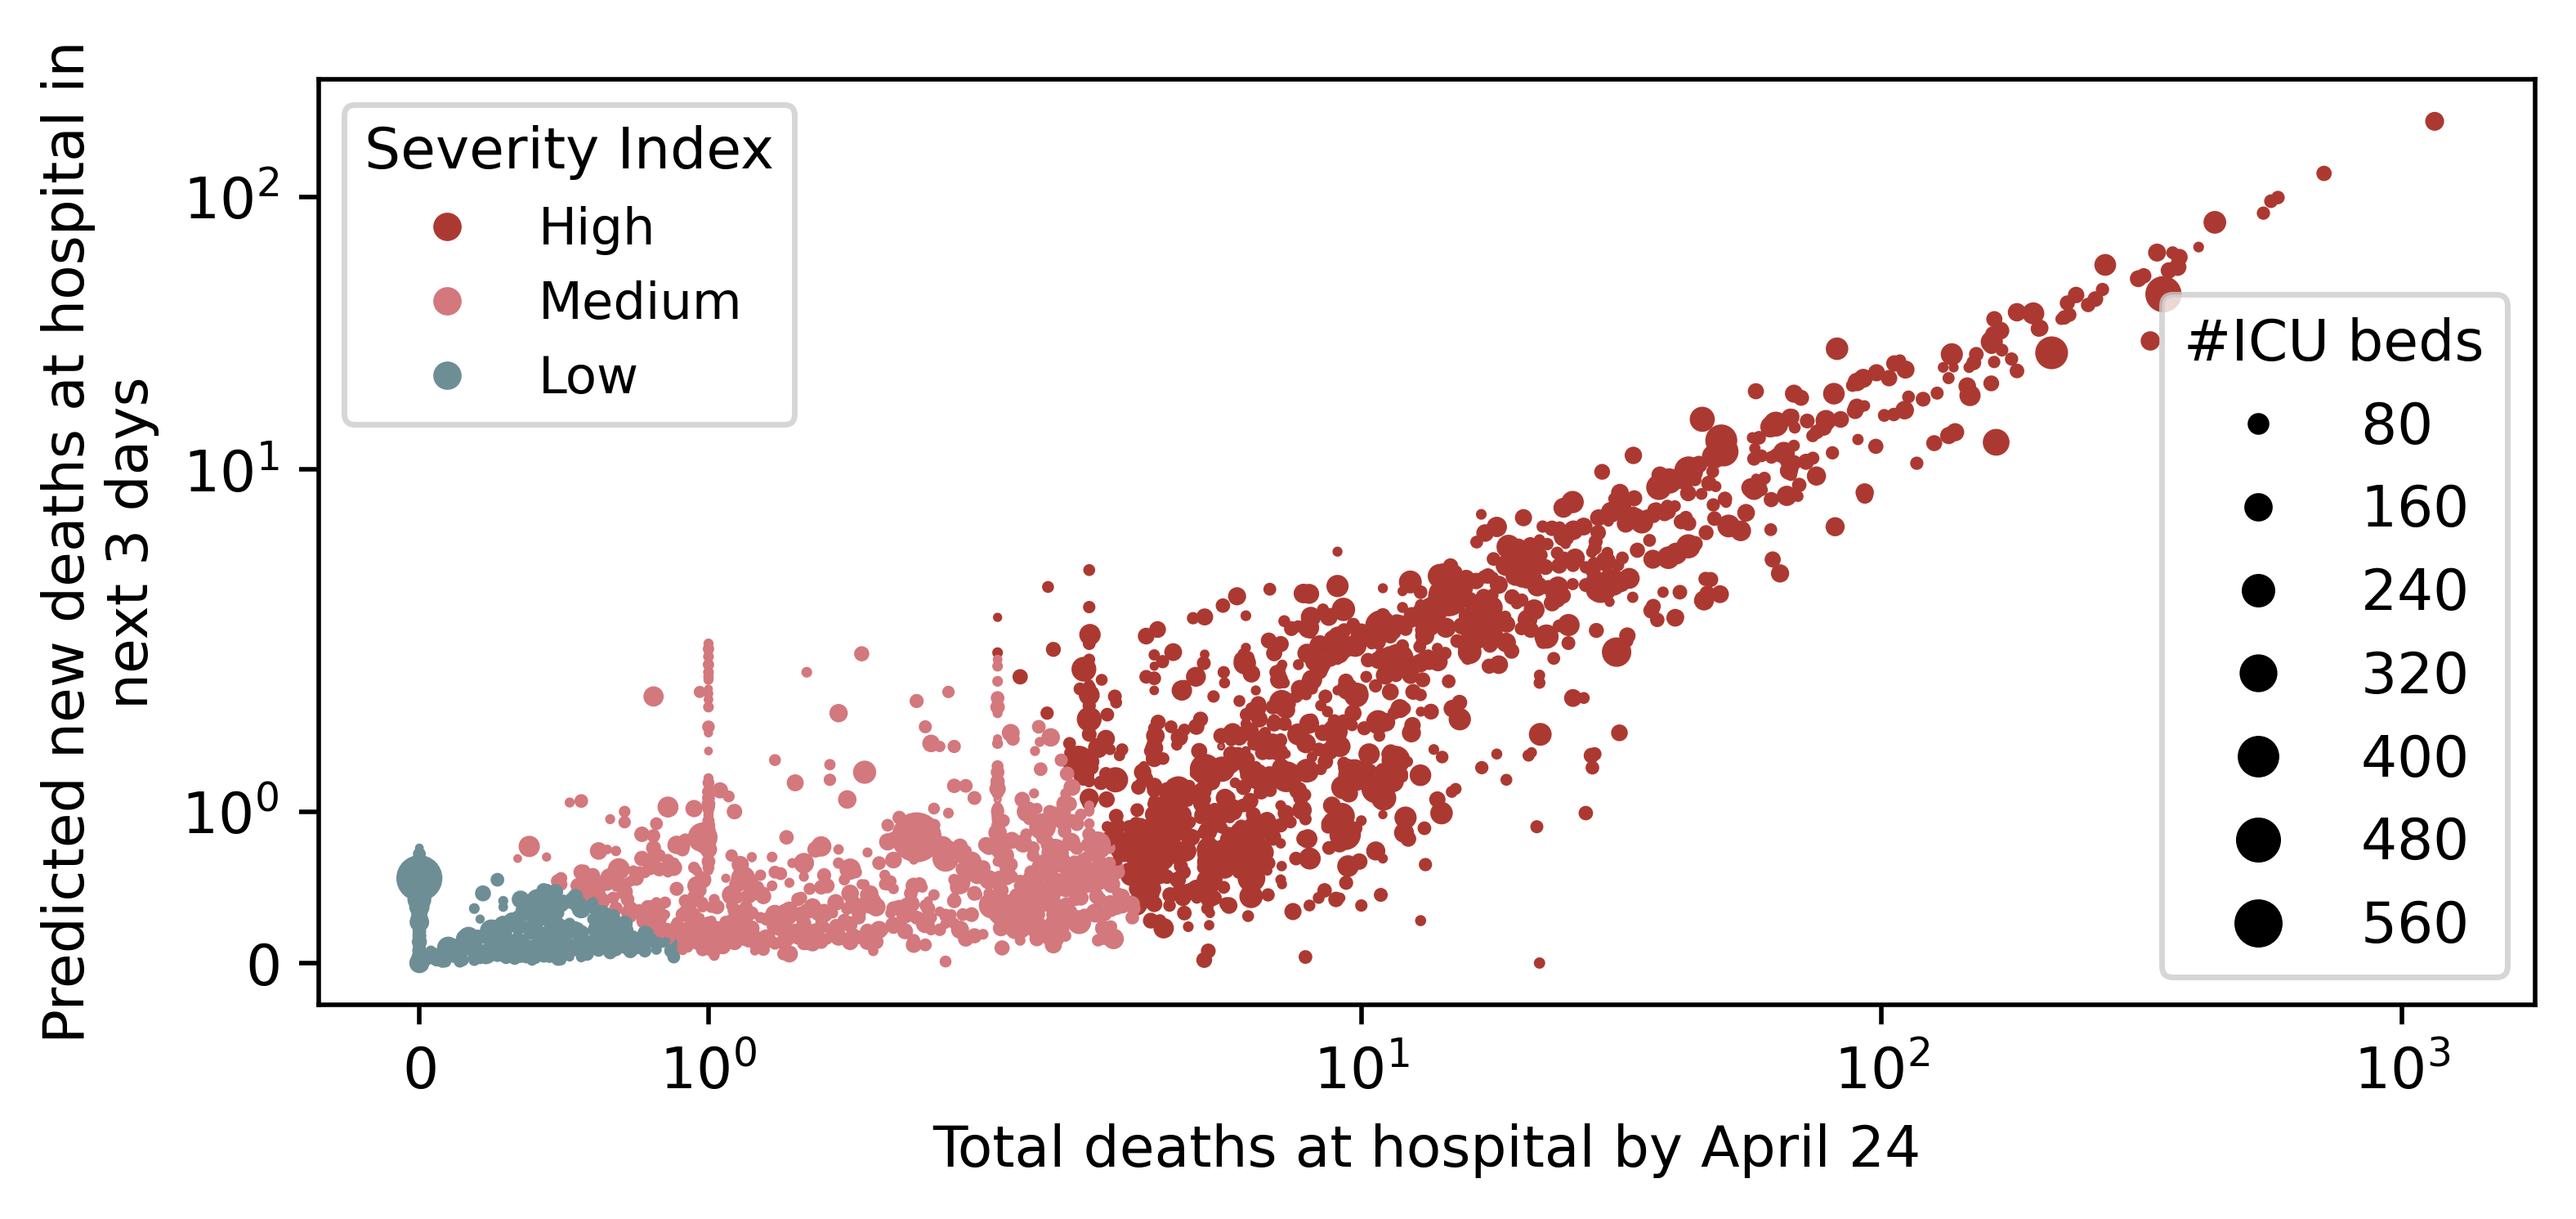

In [3]:
today = datetime.today().strftime("%B %d")
remap = {1: 'Low', 2: 'Medium', 3: 'High'}
cs_d = {i: cs[i-1] for i in [1, 2, 3]}
# cs = ['#91bfdb','#dec34b','#fc8d59']
markersize_rescaling = 10
x = d['Total Deaths Hospital']
y = d['Predicted New Deaths Hospital 3-day']
c = [cs_d[x] for x in d['Severity 3-day']] # d['Severity 3-day'] #
s = d['ICU Beds'] / markersize_rescaling
xlab = f'Total deaths at hospital by {today}'
ylab = 'Predicted new deaths at hospital in\nnext 3 days'
colorlab = 'Severity Index'
sizelab = '#ICU beds'

viz_static.plot_scatter(x, y, c, s, xlab, ylab, colorlab, sizelab, markersize_rescaling)
plt.show()

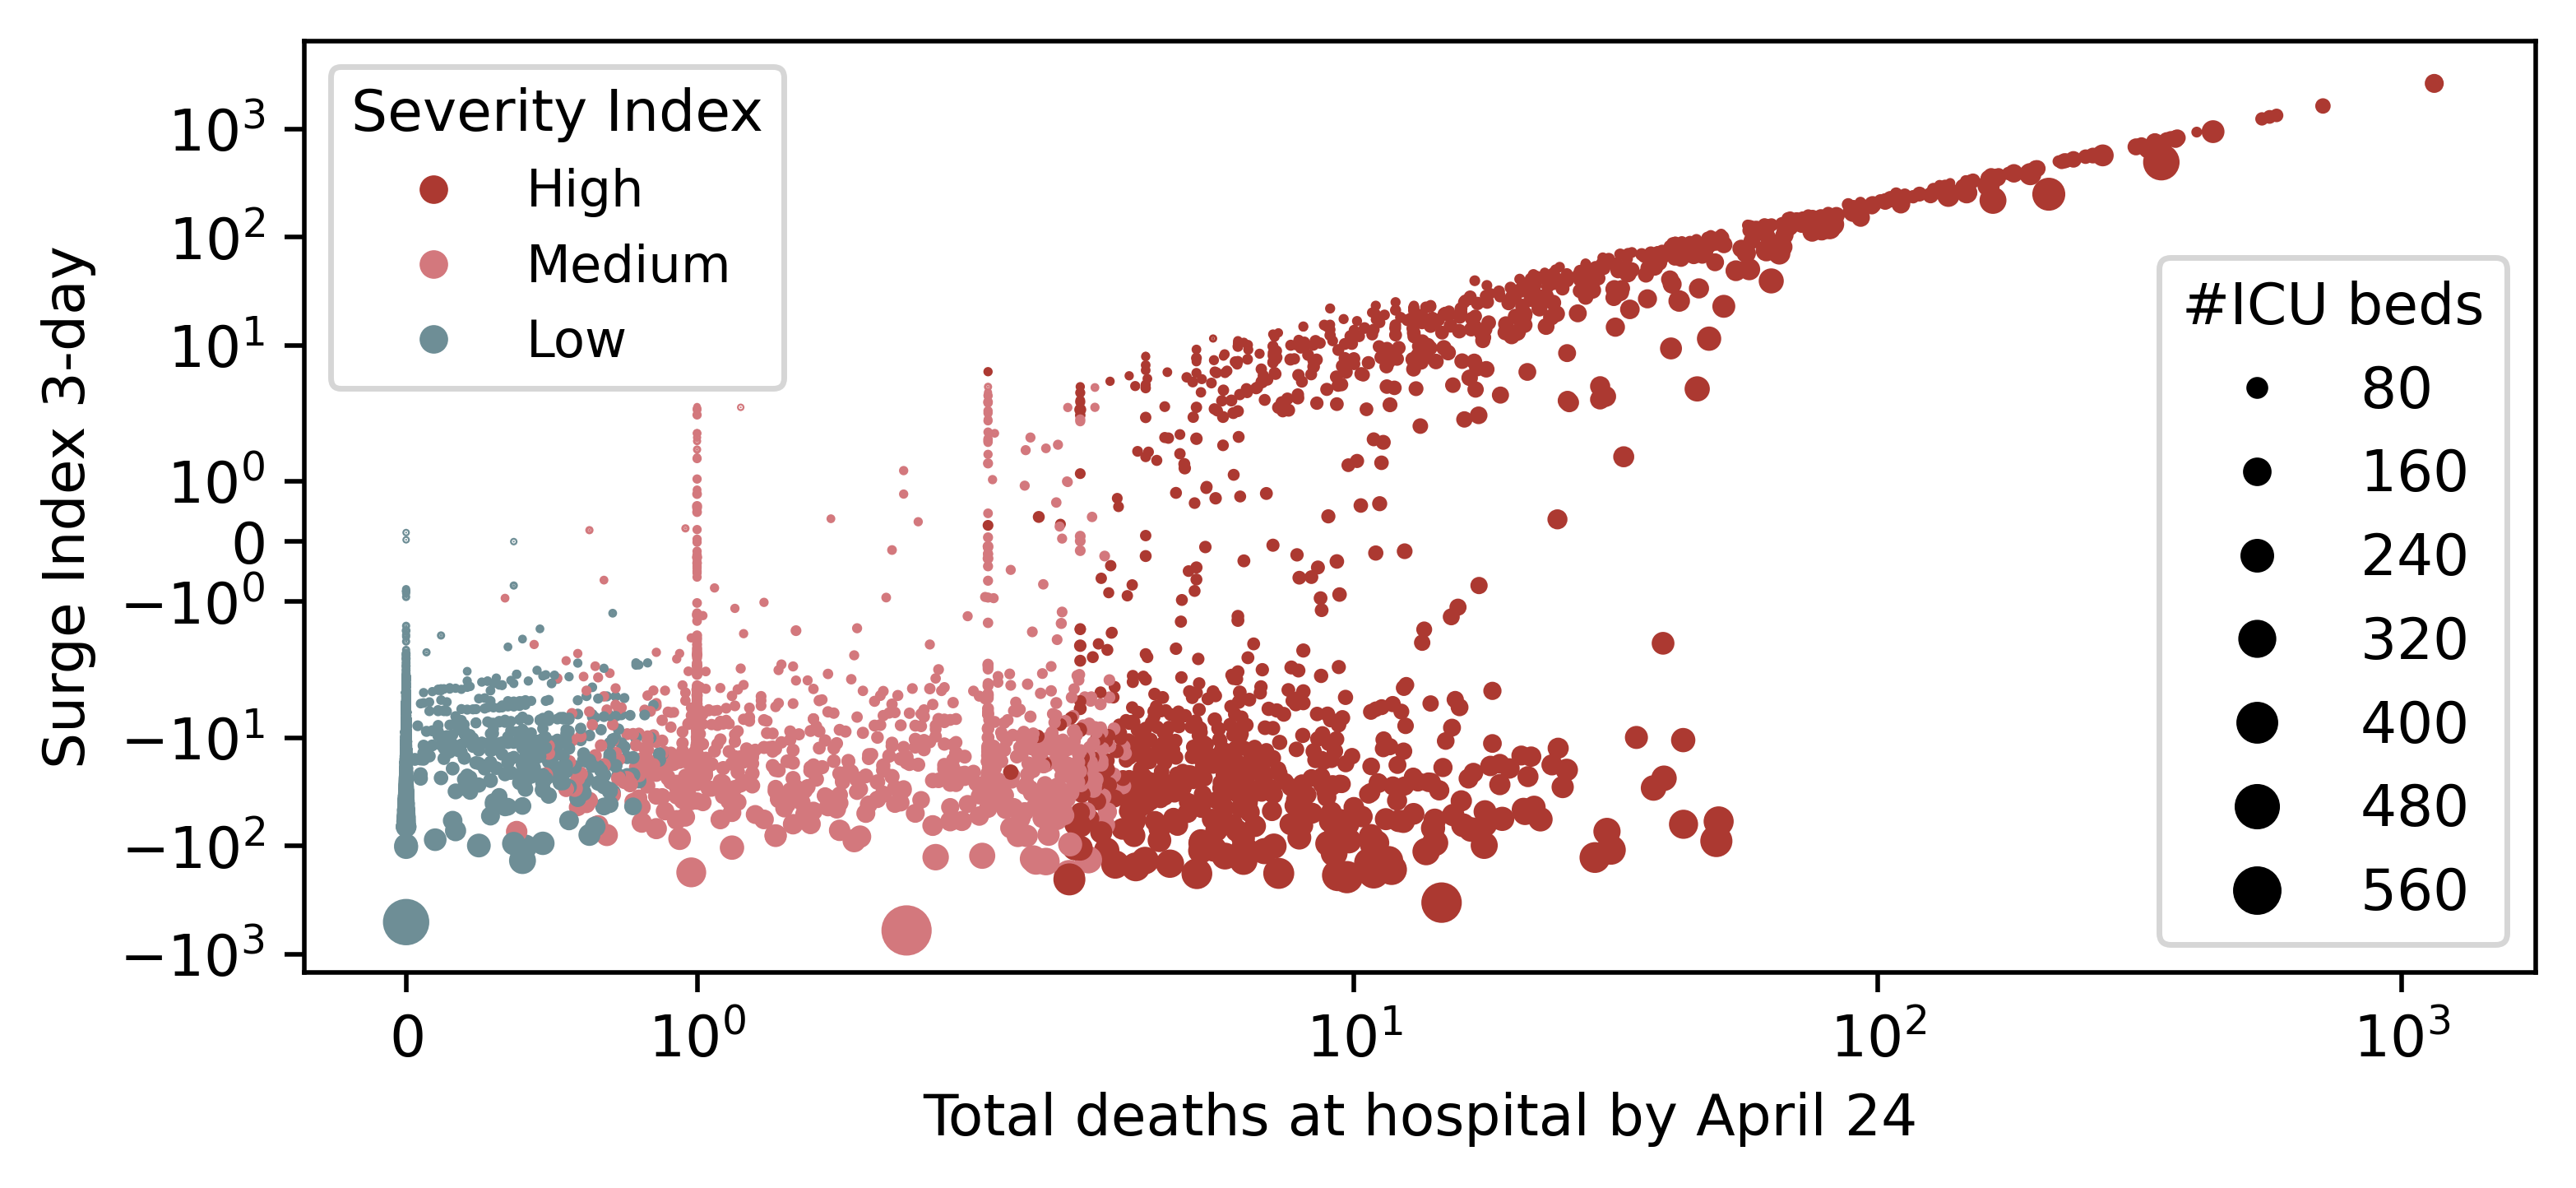

In [5]:
today = datetime.today().strftime("%B %d")
remap = {1: 'Low', 2: 'Medium', 3: 'High'}
cs_d = {i: cs[i-1] for i in [1, 2, 3]}
# cs = ['#91bfdb','#dec34b','#fc8d59']
markersize_rescaling = 10
x = d['Total Deaths Hospital']
y = d['Surge 3-day']
c = [cs_d[x] for x in d['Severity 3-day']] # d['Severity 3-day'] #
s = d['ICU Beds'] / markersize_rescaling
xlab = f'Total deaths at hospital by {today}'
ylab = 'Surge Index 3-day'
colorlab = 'Severity Index'
sizelab = '#ICU beds'

viz_static.plot_scatter(x, y, c, s, xlab, ylab, colorlab, sizelab, markersize_rescaling)
plt.show()

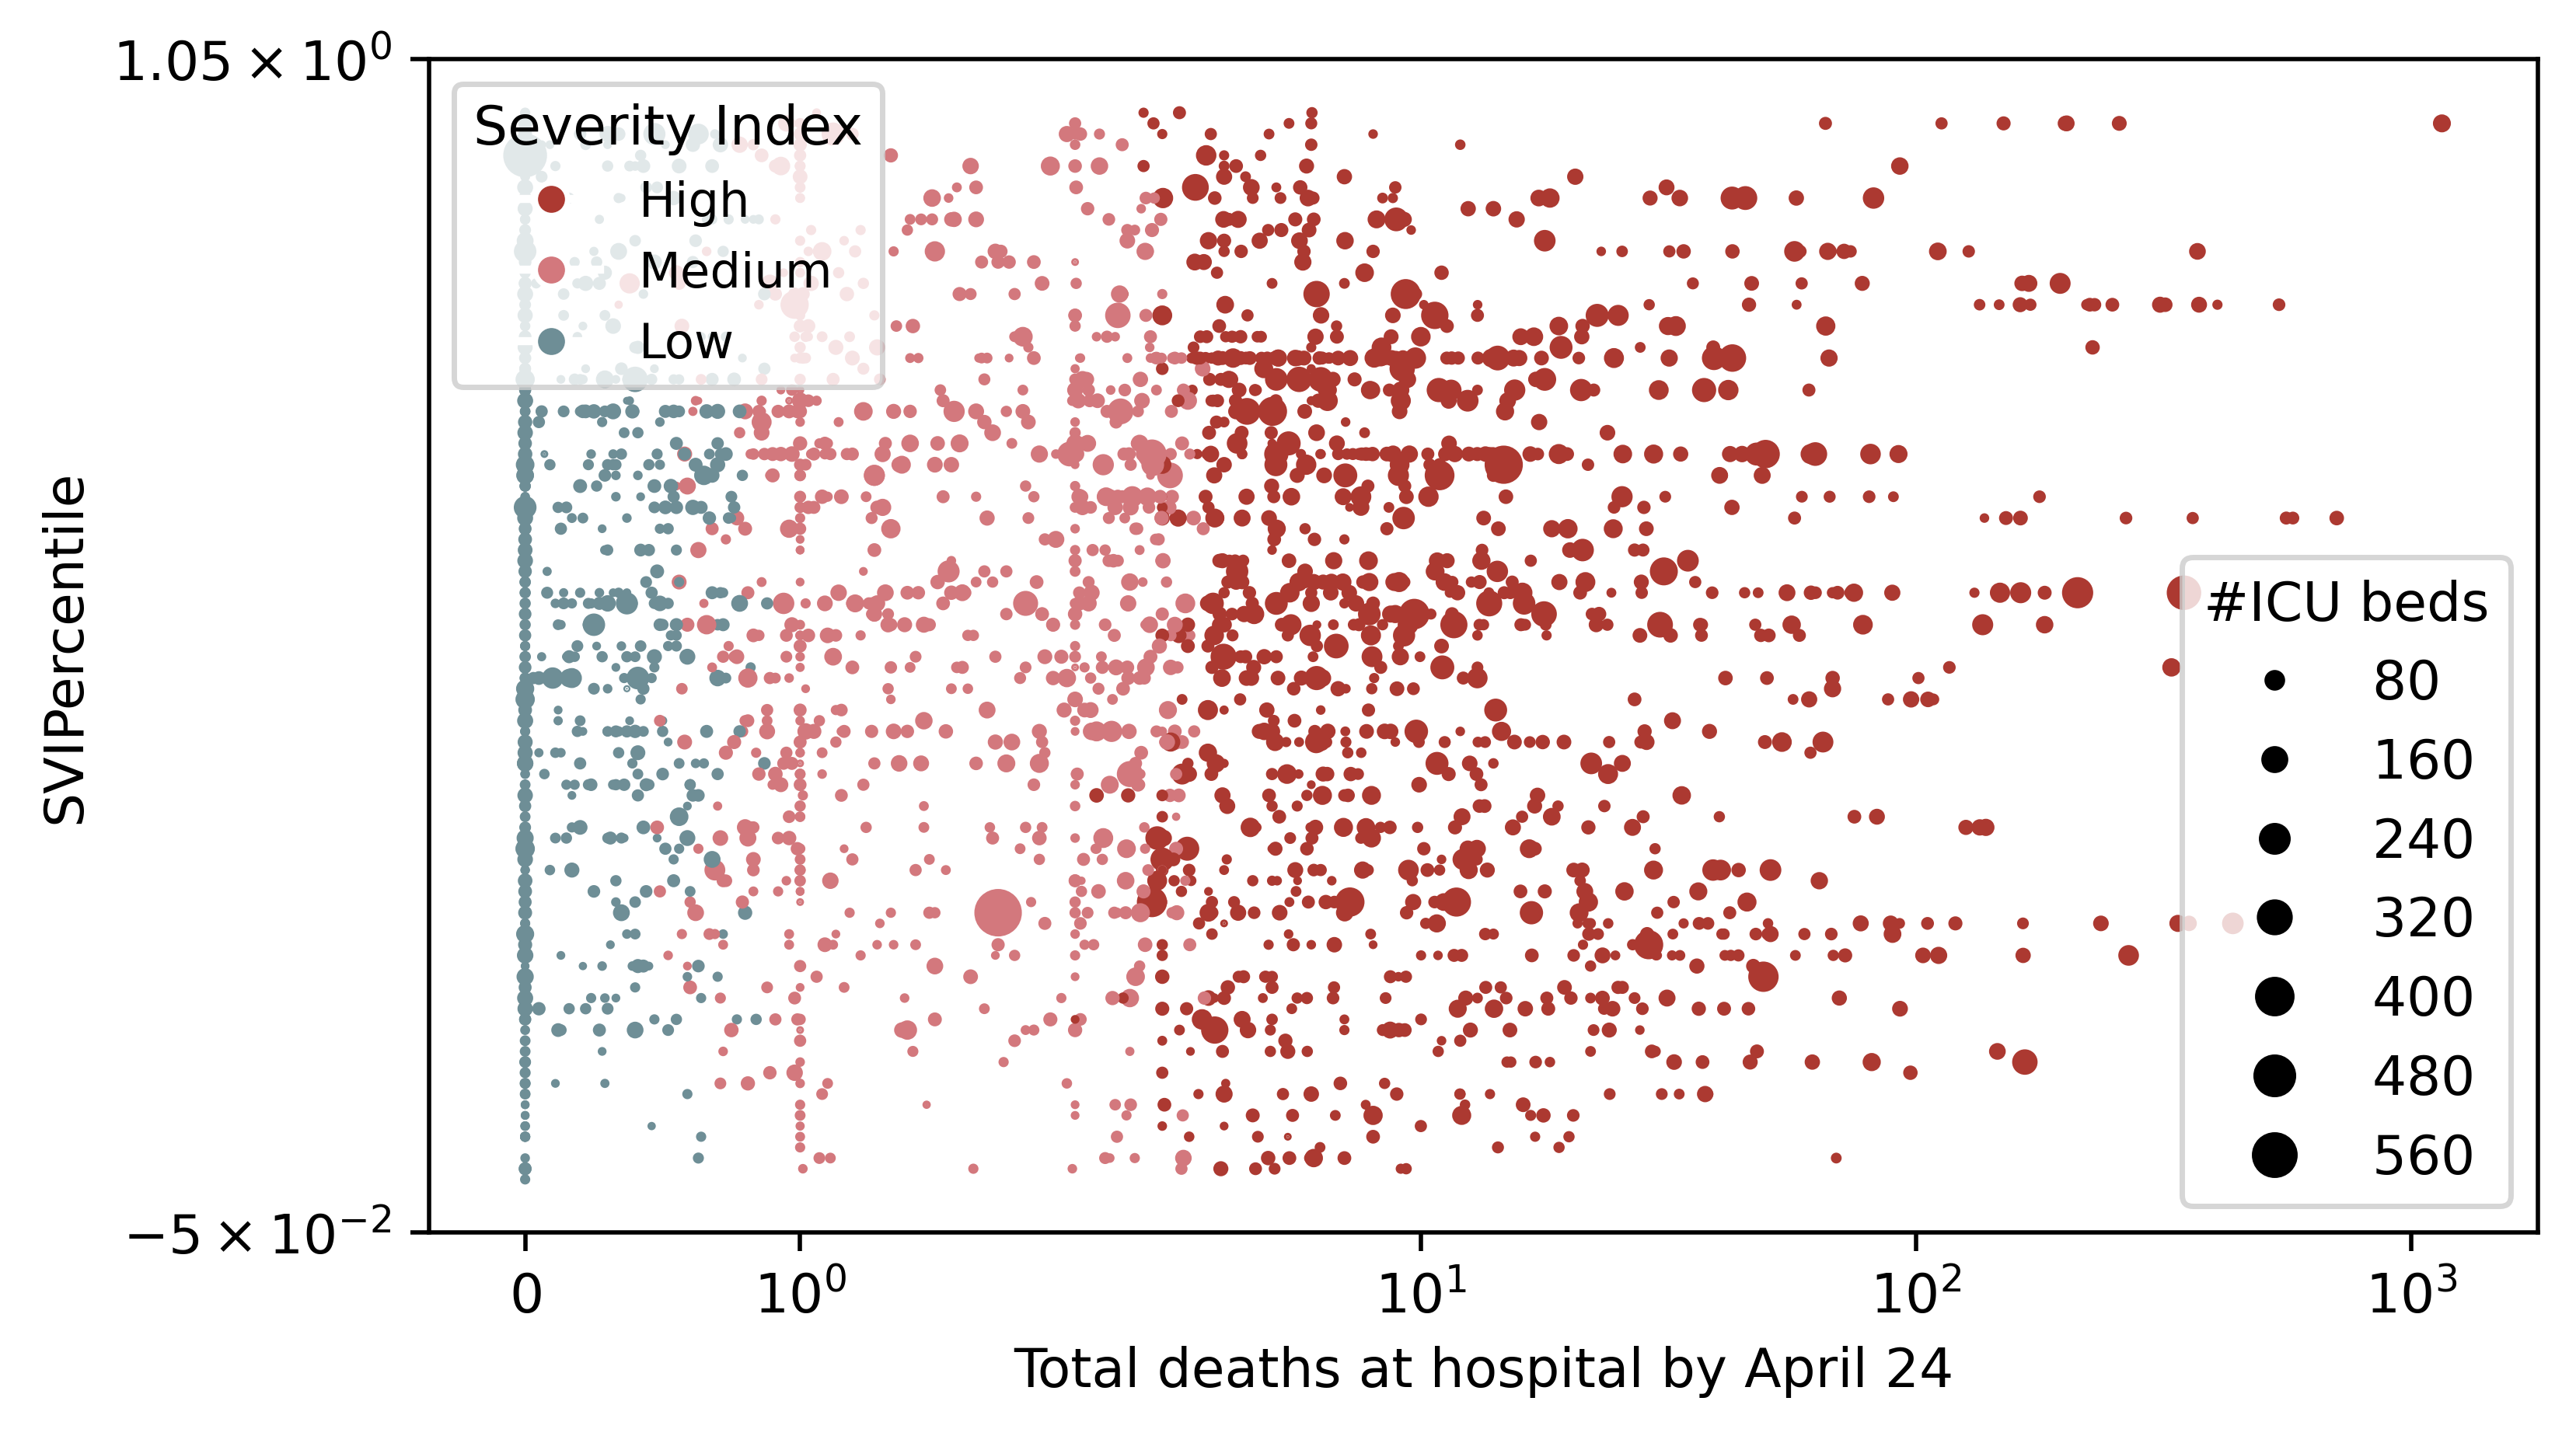

In [4]:
today = datetime.today().strftime("%B %d")
remap = {1: 'Low', 2: 'Medium', 3: 'High'}
cs_d = {i: cs[i-1] for i in [1, 2, 3]}
# cs = ['#91bfdb','#dec34b','#fc8d59']
markersize_rescaling = 10
x = d['Total Deaths Hospital']
y = d['SVIPercentile']
c = [cs_d[x] for x in d['Severity 3-day']] # d['Severity 3-day'] #
s = d['ICU Beds'] / markersize_rescaling
xlab = f'Total deaths at hospital by {today}'
ylab = 'SVIPercentile'
colorlab = 'Severity Index'
sizelab = '#ICU beds'

viz_static.plot_scatter(x, y, c, s, xlab, ylab, colorlab,
                        sizelab, markersize_rescaling, figsize=(7, 4))
plt.show()